# hw 2
## due Feb. 9, 12:30 pm

## Dataset

`wb_lifexpec` data on github site

## Q1

Plot all non-`year` variables with `year` on the x axis, as I did in the class slides with different colors for the different country variables.

You can use the default colors and ouput in excel/python.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
d = pd.read_csv('https://github.com/brendanrbrown/stor155_sp21/raw/main/data/wb_lifexpec.csv')

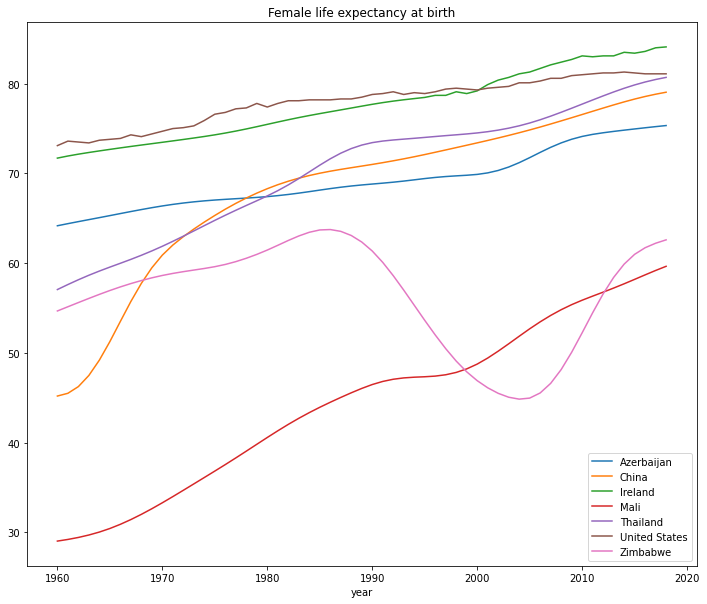

In [3]:
d.plot(kind = 'line', x = 'year', title = 'Female life expectancy at birth', figsize = (12, 10))
plt.show()

## Q2

Make a scatterplot of variables `United States` and `China` like I did in class.

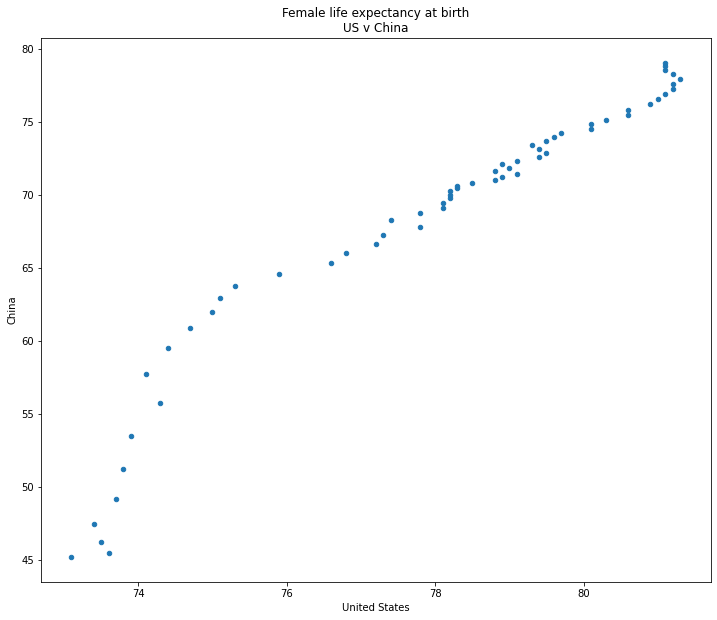

In [4]:
d.plot(kind = 'scatter', x = 'United States', y = 'China', 
       title = 'Female life expectancy at birth\nUS v China', figsize = (12, 10))
plt.show()

## Q3

Create two new variables

- `change_us` with the year-by-year change in the variable `United States`
- `change_china`, same but for `China`

**For excel users:** You will need to manually set your first value to "" (blank). This allows the correlation function to ignore this cell.

You cannot enter `#N/A`, the true 'missing' value label in excel,  or 0. In the first case excel will not know what to do, and in the second case excel will calculate the incorrect correlation.

In [5]:
# some renaming to make life easier
d = d.rename(columns = lambda x: x.lower()).rename(columns = {'united states': 'us'})
d.columns

Index(['year', 'azerbaijan', 'china', 'ireland', 'mali', 'thailand', 'us',
       'zimbabwe'],
      dtype='object')

In [6]:
# china_change instead of change_china
d = d.join(d.drop(columns = 'year').diff(), rsuffix = "_change")

In [7]:
d.head()

,year,azerbaijan,china,ireland,mali,thailand,us,zimbabwe,azerbaijan_change,china_change,ireland_change,mali_change,thailand_change,us_change,zimbabwe_change
0,1960,64.168,45.191,71.707,29.026,57.059,73.1,54.672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1961,64.403,45.497,71.941,29.210,57.617,73.6,55.141,0.235,0.306,0.234,0.184,0.558,0.5,0.469
2,1962,64.629,46.243,72.147,29.432,58.151,73.5,55.609,0.226,0.746,0.206,0.222,0.534,-0.1,0.468
3,1963,64.852,47.486,72.334,29.704,58.653,73.4,56.071,0.223,1.243,0.187,0.272,0.502,-0.1,0.462
4,1964,65.074,49.194,72.510,30.033,59.120,73.7,56.521,0.222,1.708,0.176,0.329,0.467,0.3,0.450


## Q4

Make a scatterplot of `change_us` vs `change_china` and give it a reasonable title.

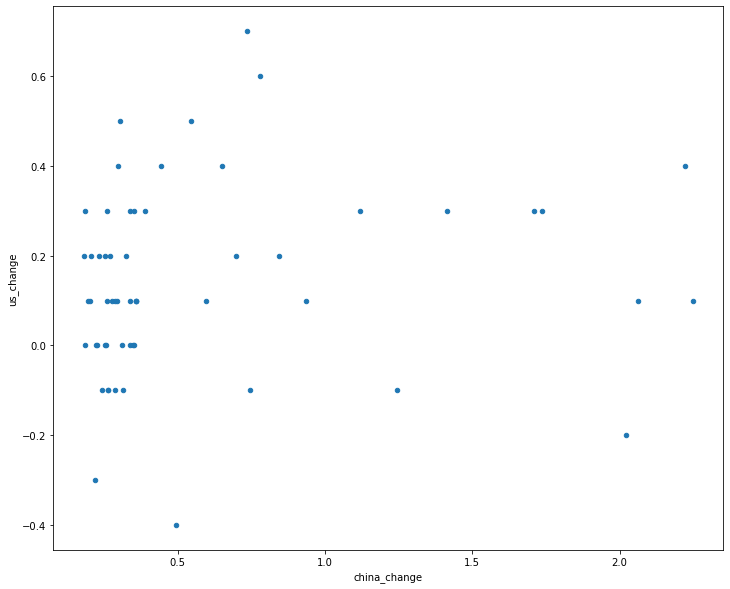

In [8]:
# some plot shortcuts same as .plot(kind = 'scatter', ...)
d.plot.scatter(x = 'china_change', y = 'us_change', figsize = (12, 10))
plt.show()

## Q5

Calculate the correlations between

- `United States` and `China`
- `change_us` and `change_china`

**HINT:** See my note above about missing values for excel users.

**Correlation among all original time series variables**

~ is logical `not` for pandas series. 

In [9]:
d.loc[:, ~ d.columns.str.contains("change")].corr()

,year,azerbaijan,china,ireland,mali,thailand,us,zimbabwe
year,1.000000,0.973386,0.917186,0.995431,0.994587,0.980959,0.971318,-0.326870
azerbaijan,0.973386,1.000000,0.863135,0.984776,0.967156,0.930221,0.922575,-0.242797
china,0.917186,0.863135,1.000000,0.890360,0.931684,0.952417,0.962052,-0.159719
ireland,0.995431,0.984776,0.890360,1.000000,0.990374,0.966177,0.957508,-0.329095
mali,0.994587,0.967156,0.931684,0.990374,1.000000,0.990327,0.983958,-0.262148
thailand,0.980959,0.930221,0.952417,0.966177,0.990327,1.000000,0.988173,-0.234158
us,0.971318,0.922575,0.962052,0.957508,0.983958,0.988173,1.000000,-0.249111
zimbabwe,-0.326870,-0.242797,-0.159719,-0.329095,-0.262148,-0.234158,-0.249111,1.000000


**Correlation among all 'change' variables**

In [10]:
d.loc[:, d.columns.str.contains("change")].corr()

,azerbaijan_change,china_change,ireland_change,mali_change,thailand_change,us_change,zimbabwe_change
azerbaijan_change,1.000000,0.034395,0.325398,0.302339,-0.014886,0.048141,0.337926
china_change,0.034395,1.000000,-0.156994,0.068387,0.268397,0.136423,0.181751
ireland_change,0.325398,-0.156994,1.000000,0.331082,-0.050371,0.143731,-0.013684
mali_change,0.302339,0.068387,0.331082,1.000000,0.480347,0.231284,0.390809
thailand_change,-0.014886,0.268397,-0.050371,0.480347,1.000000,0.200808,0.599416
us_change,0.048141,0.136423,0.143731,0.231284,0.200808,1.000000,0.045353
zimbabwe_change,0.337926,0.181751,-0.013684,0.390809,0.599416,0.045353,1.000000


## Q6

Write one or two sentences about why your answer in Q5 does or does not make sense. A good answer should refer back to the plots you made previously and explicitly apply concepts from class.

Answer: You can easily fit a straight line with positive slope through the scatterplot of US and China. We saw in class that means there is a strong positive correlation --- so the correlation near 1 makes sense there.

You can't fit a straight line easily through the change variables plot --- at least not one with a non-zero slope. We saw in class that means correlation is weak, meaning near zero.

## Q7

Create a new variable `change_mali` with the year over year changes in Mali's female life expectancy.

- average of `change_mali`
- correlation between `Mali` and `year`
- correlation between `change_mali` and `year`

In [11]:
d.mali_change.mean()

0.5279827586206896

In [12]:
# variable created above along with the others

d.loc[:, ['mali_change', 'mali', 'year']].corr()

,mali_change,mali,year
mali_change,1.000000,-0.005326,-0.017268
mali,-0.005326,1.000000,0.994587
year,-0.017268,0.994587,1.000000


## Q8

Comment on your answers from Q7 by writing a couple of sentences in response to the following questions:

- Comparing the average of `change_mali` and the correlation between `Mali` and `year`: Does this make sense based on the concepts discussed in class? Why or why not?
- In words, try to explain the difference between the two correlation statistics.

The times series plot shows Mali increasing over the period time presented, so the average change is positive in that time as discussed in the lecture. Similarly, the positive correlation between year and mali suggests an increasing trend. These two make sense together.

As in the answer for Q6, a plot of mali_change vs year shows no clear trend in the mali_change variable over the entire time period. In other words, though mali is increasing over this time period it is *not* consistently increasing at an *increasing rate*.

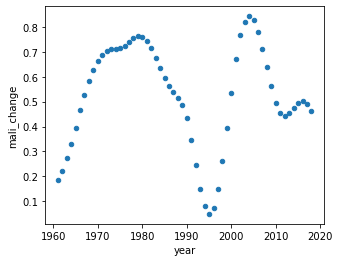

In [13]:
d.plot.scatter(x = 'year', y = 'mali_change', figsize = (5, 4))
plt.show()